In [1]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Load data
eqk_url = 'https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv'
raw_eqk = pd.read_csv(eqk_url)

fp = os.path.join('data', 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries.shp')
world = gpd.read_file(fp)

In [4]:
raw_eqk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   id         120108 non-null  object 
 6   place      120108 non-null  object 
 7   type       120108 non-null  object 
dtypes: float64(4), object(4)
memory usage: 7.3+ MB


In [5]:
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


In [6]:
eqk = raw_eqk[(raw_eqk['mag'] >= 6.5) & (raw_eqk['type'] == 'earthquake')]

In [7]:
eqk = gpd.GeoDataFrame(eqk, # Data
                 geometry = gpd.points_from_xy(eqk.longitude, eqk.latitude), # Specify geometry columns
                 crs = 4326) # Specify CRS

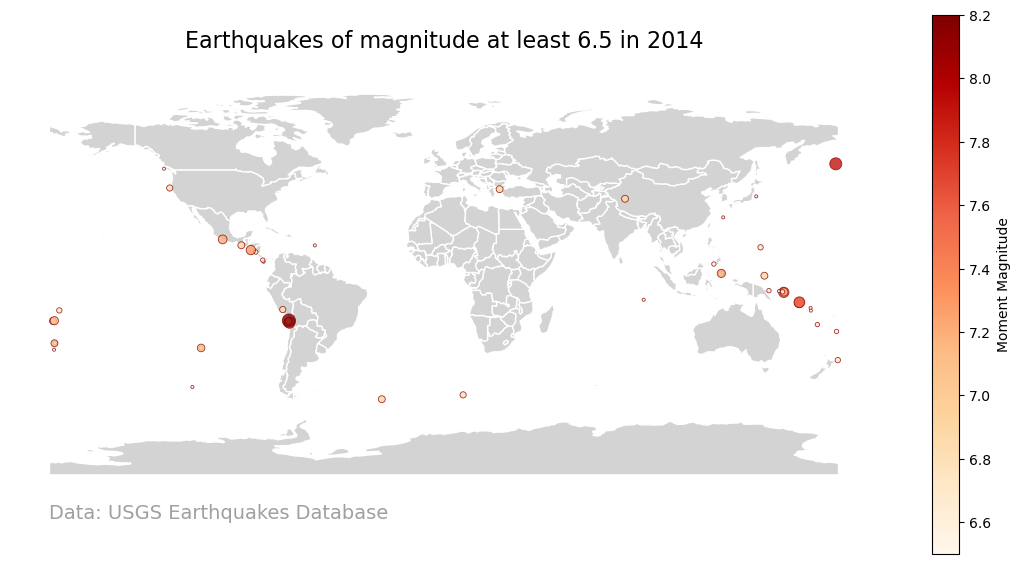

In [8]:
fig, ax = plt.subplots(figsize = (14, 7))

# Add states
world.plot(ax = ax,
           color = 'lightgray',
           edgecolor = 'white')

# Add power plants colored by energy source
eqk.plot(ax = ax,
         column = 'mag',
         cmap = 'OrRd',
         markersize = (eqk['mag'] - 6.4) * 50,
         alpha = 0.8,
         edgecolor = 'darkred',
         linewidth = 0.6,
         legend = True,
         legend_kwds = {'label': "Moment Magnitude"})

# Title
ax.set_title('Earthquakes of magnitude at least 6.5 in 2014',
             fontsize = 16, pad = 20)
ax.text(-180, -110, 'Data: USGS Earthquakes Database', fontsize = 14, color = 'grey', alpha = 0.75)

# Clean up axes
ax.set_axis_off()

# Display
plt.show()